<a href="https://colab.research.google.com/github/jonathanahc/Practicas/blob/main/Pr%C3%A1ctica_21_Ejercicios_con_EDA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA completo**

## Carga de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"
columnas = ['age', 'year', 'nodes', 'status']
df = pd.read_csv(url, header=None, names=columnas)

In [4]:
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


## Análisis estadístico

In [6]:
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [8]:
moda = df.mode().iloc[0]
moda

,0
age,52
year,58
nodes,0
status,1


In [9]:
columnas = df.select_dtypes(include=np.number)
mediana = columnas.median()
mediana

,0
age,52.0
year,63.0
nodes,1.0
status,1.0


## Histogramas para las columnas numéricas

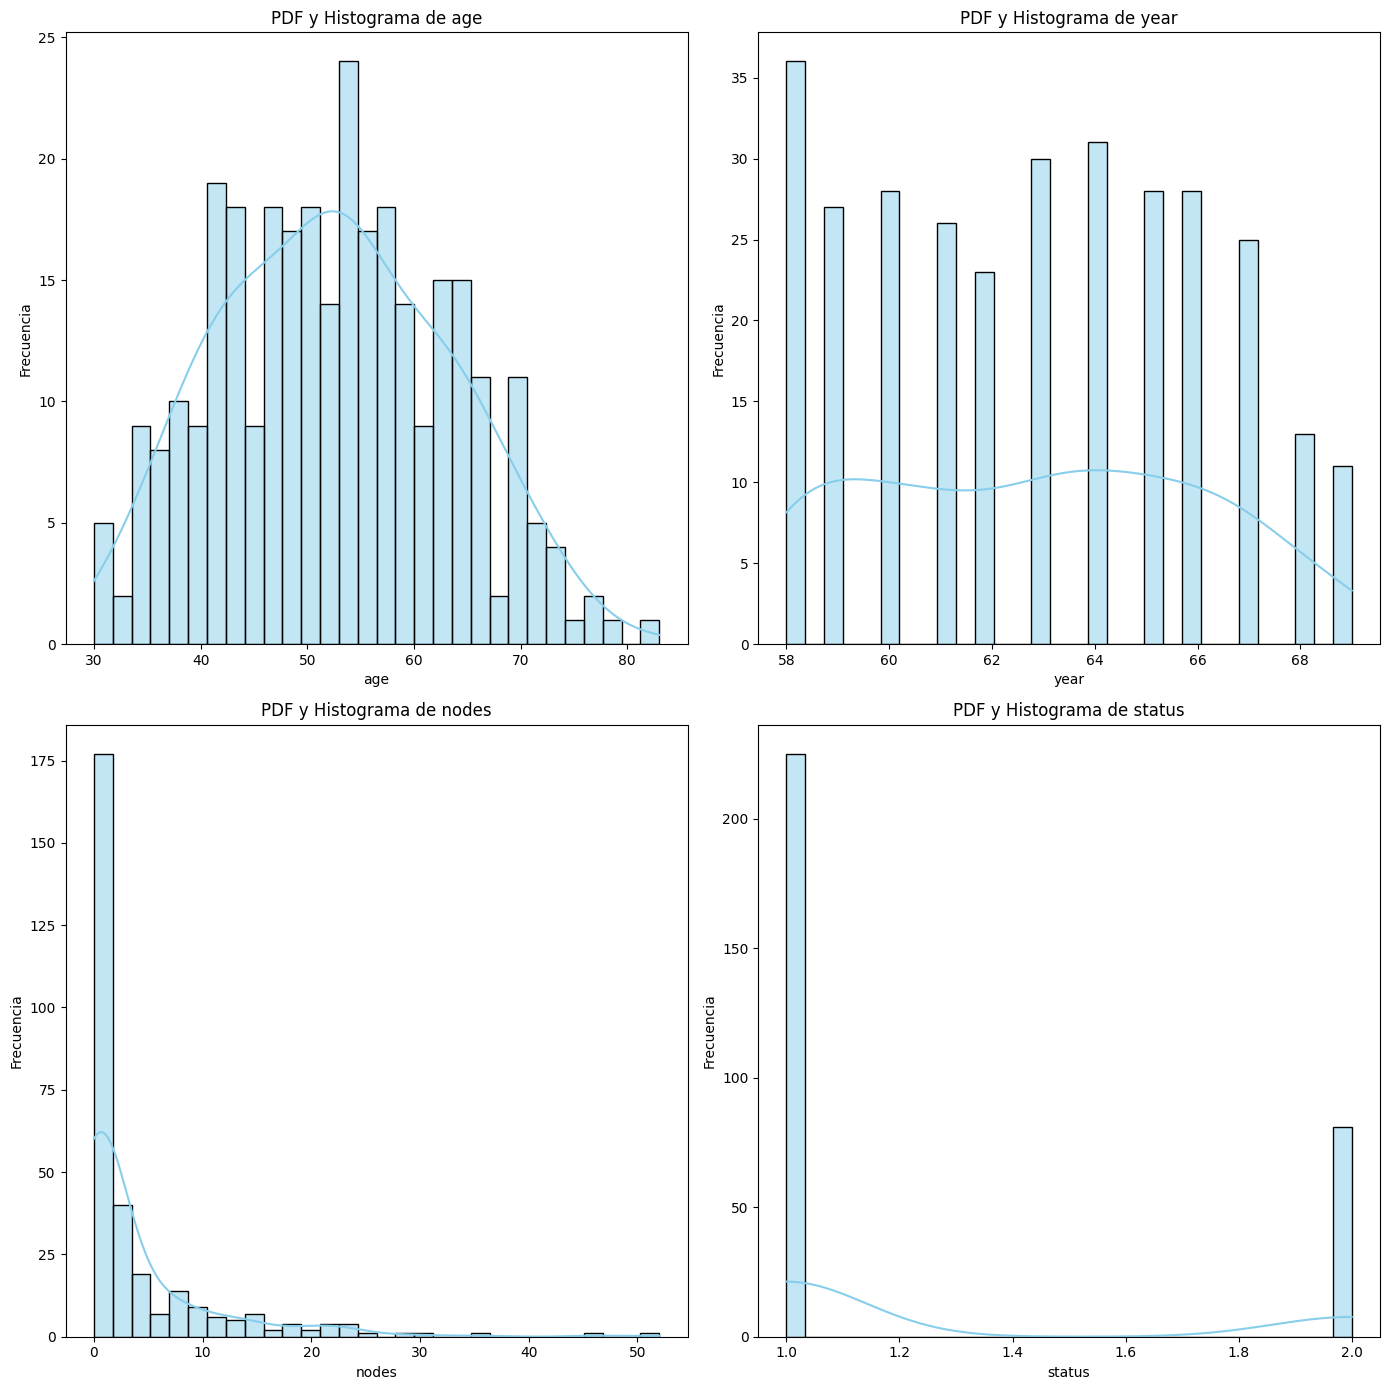

In [10]:
plt.figure(figsize=(14, 14))
for i, col in enumerate(df.columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'PDF y Histograma de {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frecuencia', fontsize=10)

plt.tight_layout()
plt.show()

## Gráfica de barras para la columna categórica Status

## Boxplots para identificar outliers en las columnas numéricas

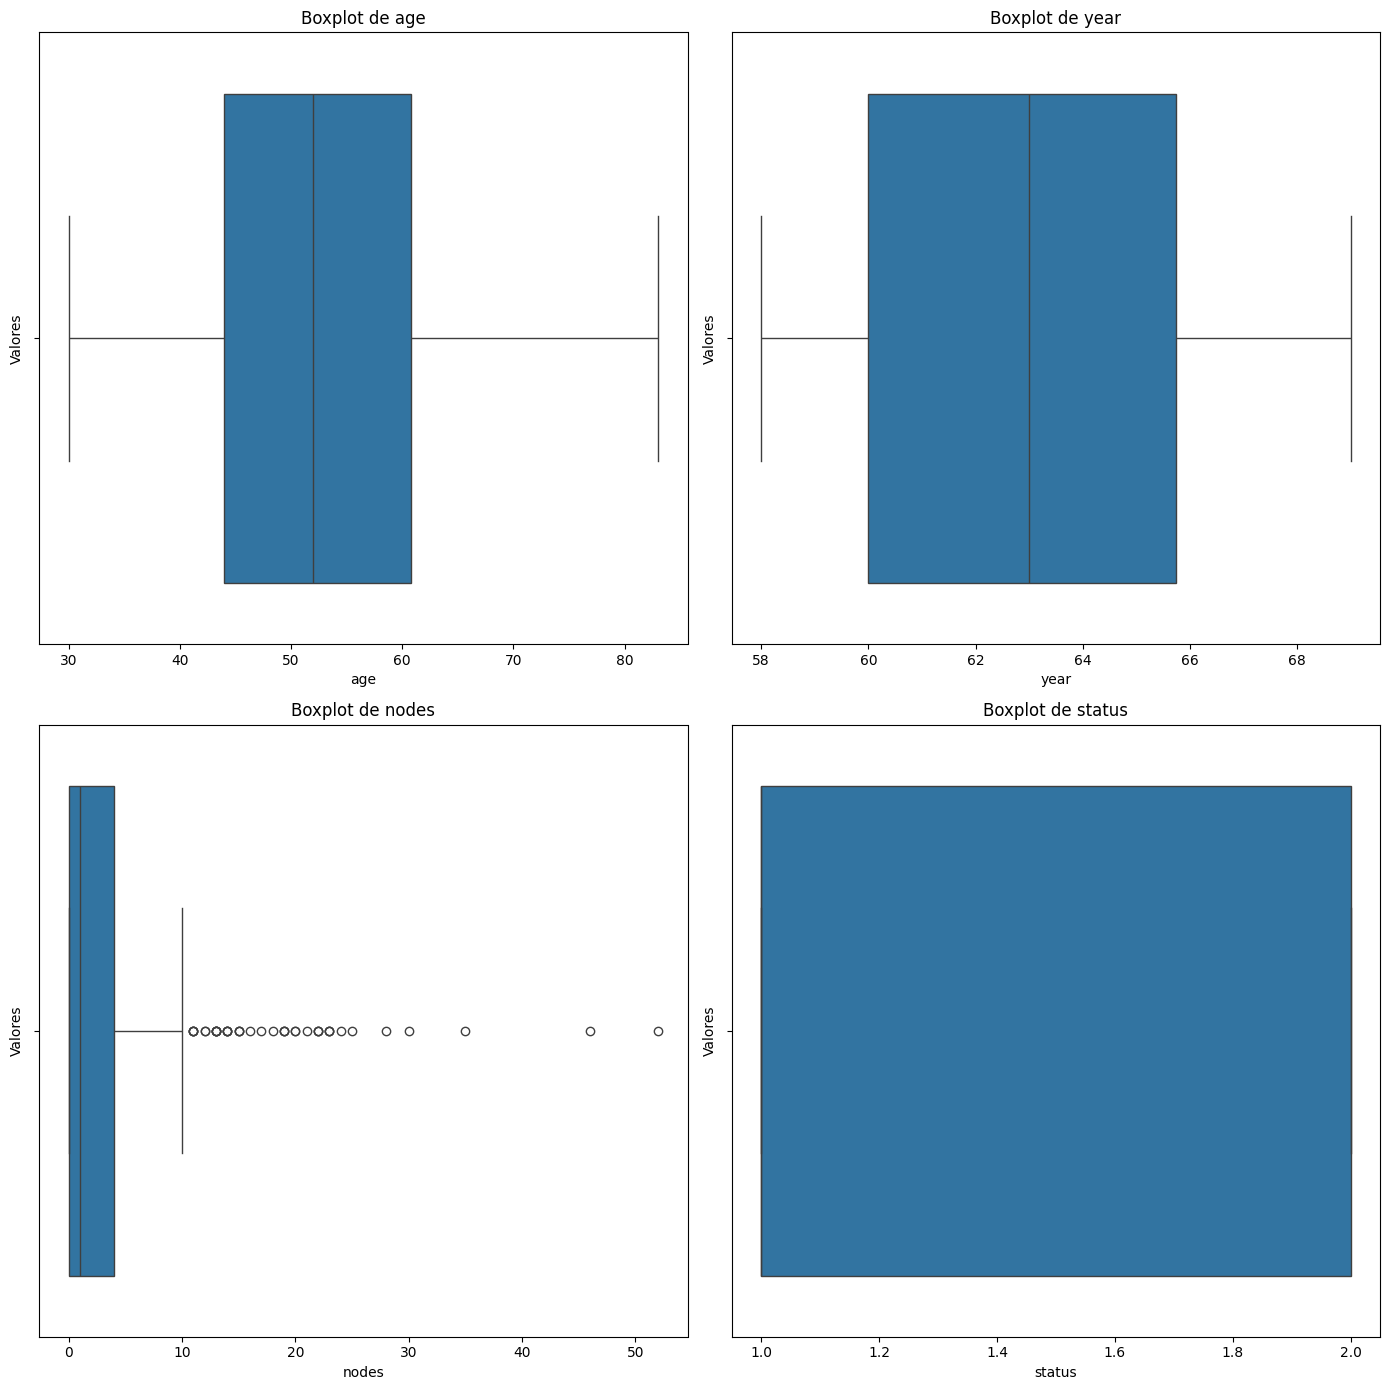

In [11]:
plt.figure(figsize=(14, 14))
for i, col in enumerate(df.columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col].dropna())
    plt.title(f'Boxplot de {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Valores', fontsize=10)
plt.tight_layout()
plt.show()

## Matriz de correlación y mapa de calor

             age      year     nodes    status
age     1.000000  0.089529 -0.063176  0.067950
year    0.089529  1.000000 -0.003764 -0.004768
nodes  -0.063176 -0.003764  1.000000  0.286768
status  0.067950 -0.004768  0.286768  1.000000


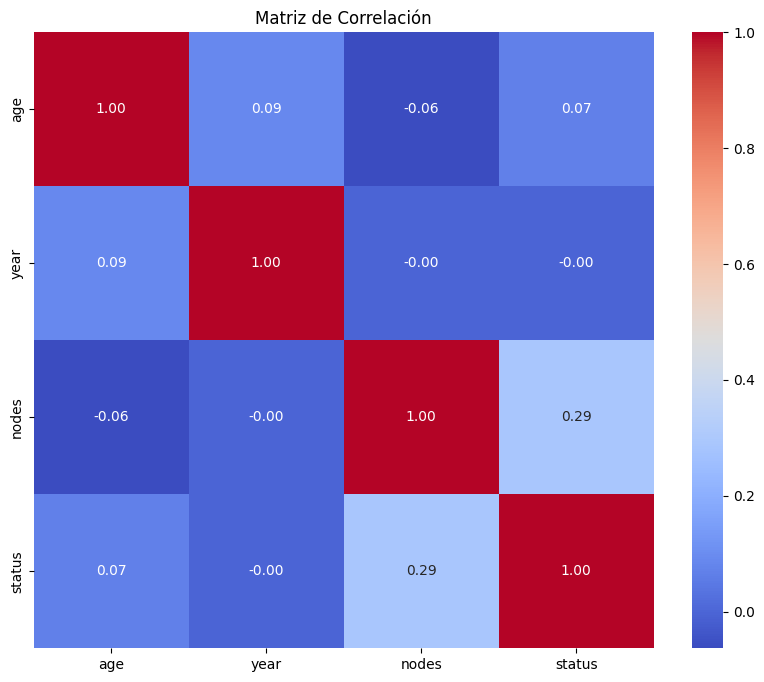

In [13]:
matriz_correlacion = df.corr()

print(matriz_correlacion)

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

## Pairplot de las relaciones entre variables númericas

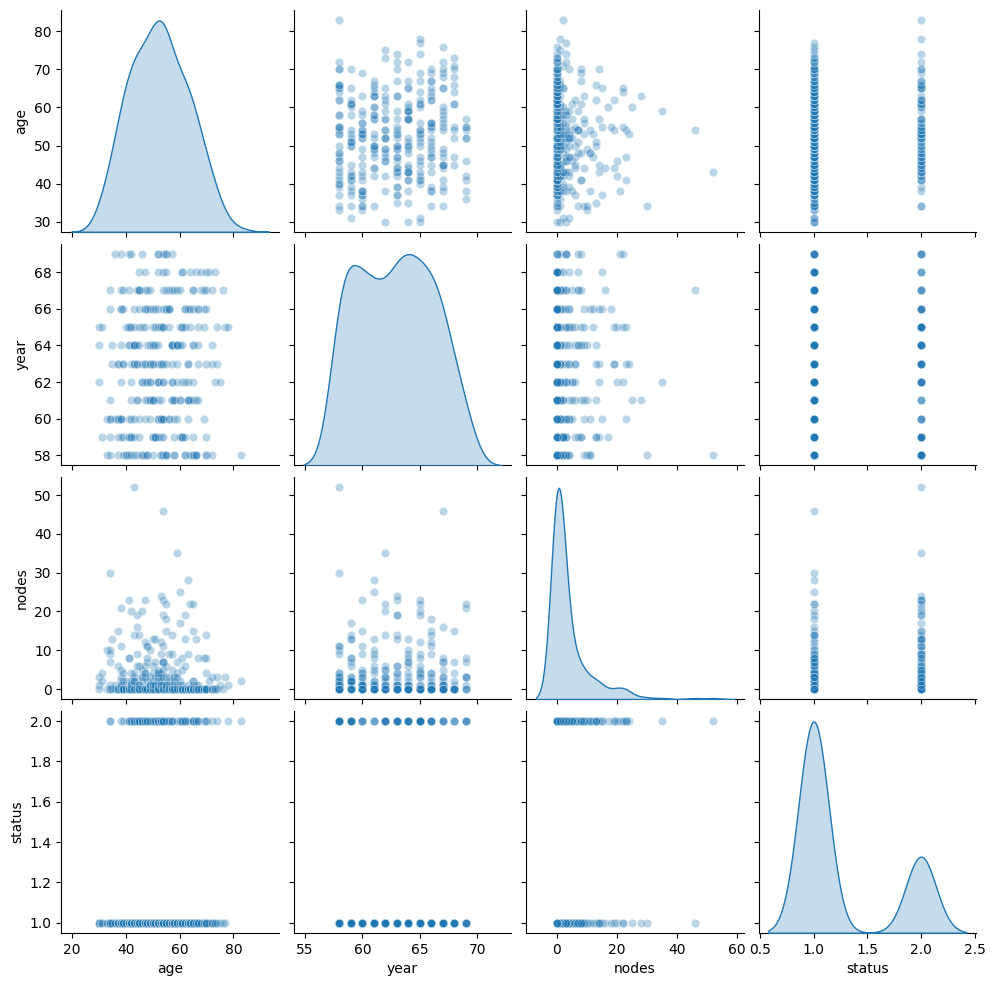

In [15]:
sns.pairplot(df, plot_kws={'alpha': 0.3}, diag_kind='kde')
plt.show()

## Pruebas de normalidad (Shapiro-Wilk, Anderson-Darling, Kolmogorov-Smirnov) y QQplot

In [16]:
def normality_tests(data, column_name):
    print(f"\nPruebas de normalidad para la columna: {column_name}")

    # Prueba de Shapiro-Wilk
    shapiro_test = stats.shapiro(data.sample(min(5000, len(data)), random_state=42))
    print(f"Shapiro-Wilk Test: p-valor = {shapiro_test.pvalue:.5f}")

    # Prueba de Kolmogorov-Smirnov
    ks_test = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
    print(f"Kolmogorov-Smirnov Test: p-valor = {ks_test.pvalue:.5f}")

    # Prueba de Anderson-Darling
    anderson_test = stats.anderson(data, dist='norm')
    print(f"Anderson-Darling Test: Estadístico = {anderson_test.statistic:.5f}")
    for i in range(len(anderson_test.critical_values)):
        sl, cv = anderson_test.significance_level[i], anderson_test.critical_values[i]
        if anderson_test.statistic < cv:
            print(f"  Al nivel de significancia {sl}%, los datos parecen normales.")
        else:
            print(f"  Al nivel de significancia {sl}%, los datos NO parecen normales.")

    # Prueba de D'Agostino-Pearson
    dagostino_test = stats.normaltest(data)
    print(f"D'Agostino-Pearson Test: p-valor = {dagostino_test.pvalue:.5f}")

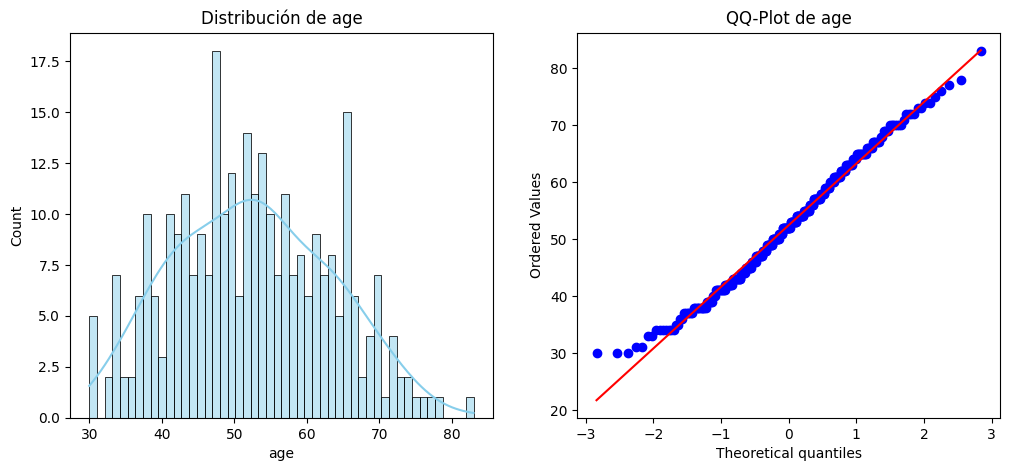


Pruebas de normalidad para la columna: age
Shapiro-Wilk Test: p-valor = 0.02605
Kolmogorov-Smirnov Test: p-valor = 0.46980
Anderson-Darling Test: Estadístico = 0.73156
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos parecen normales.
  Al nivel de significancia 2.5%, los datos parecen normales.
  Al nivel de significancia 1.0%, los datos parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00780


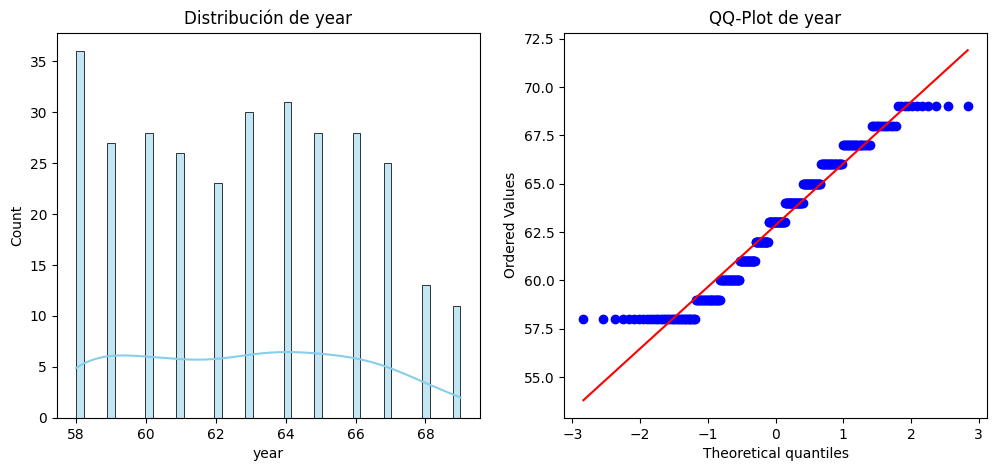


Pruebas de normalidad para la columna: year
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00158
Anderson-Darling Test: Estadístico = 4.31374
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


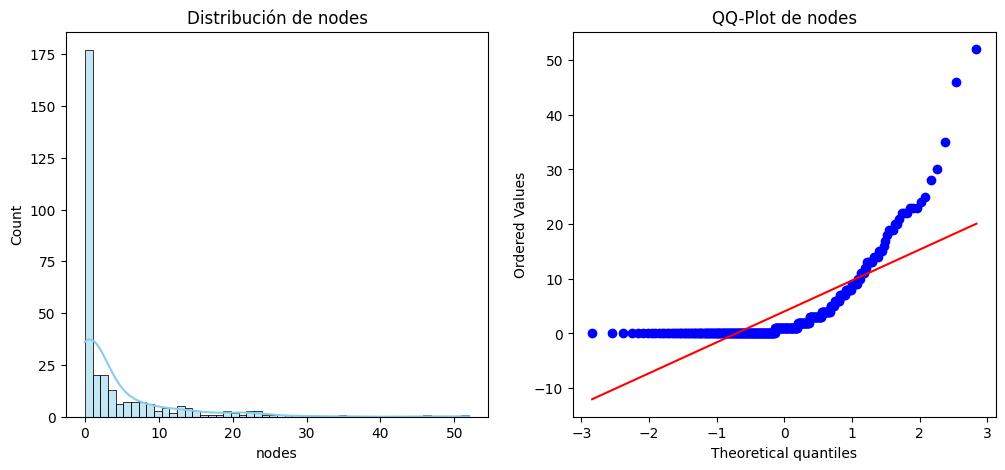


Pruebas de normalidad para la columna: nodes
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 39.68662
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


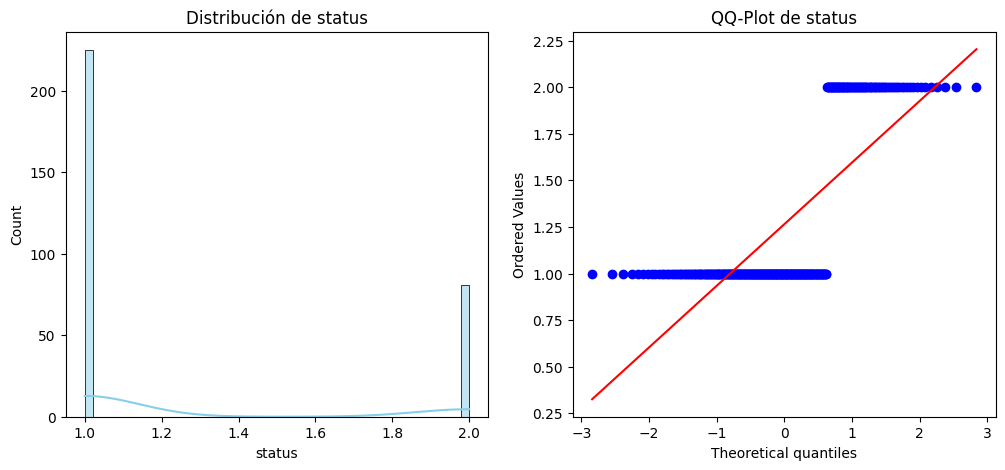


Pruebas de normalidad para la columna: status
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 71.18230
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


In [17]:
# Función para graficar histograma y QQ-Plot
def plot_distribution(data, column_name):
    plt.figure(figsize=(12, 5))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(data, bins=50, kde=True, color="skyblue")
    plt.title(f"Distribución de {column_name}")

    # QQ-Plot
    plt.subplot(1, 2, 2)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f"QQ-Plot de {column_name}")

    plt.show()

# Aplicar pruebas de normalidad y gráficos a cada columna numérica
for column in df:
    data = df[column]
    plot_distribution(data, column)
    normality_tests(data, column)

# Identificación y tratamiento de los datos faltantes

# EDA completo después del tratamiento de datos

## Análisis estadístico

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
moda = df.mode().iloc[0]
moda

In [ ]:
columnas = df.select_dtypes(include=np.number)
mediana = columnas.median()
mediana

## Histogramas para las columnas numéricas

In [ ]:
plt.figure(figsize=(14, 14))
for i, col in enumerate(df.columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'PDF y Histograma de {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frecuencia', fontsize=10)

plt.tight_layout()
plt.show()

## Gráfica de barras para la columna categórica Status

## Boxplots para identificar outliers en las columnas numéricas

In [ ]:
plt.figure(figsize=(14, 14))
for i, col in enumerate(df.columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col].dropna())
    plt.title(f'Boxplot de {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Valores', fontsize=10)
plt.tight_layout()
plt.show()

## Matriz de correlación y mapa de calor

In [ ]:
matriz_correlacion = df.corr()

print(matriz_correlacion)

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

## Pairplot de las relaciones entre variables numéricas

In [ ]:
sns.pairplot(df, plot_kws={'alpha': 0.3}, diag_kind='kde')
plt.show()

## Pruebas de normalidad (Shapiro-Wilk, Anderson-Darling, Kolmogorov-Smirnov) y QQplot

In [ ]:
def normality_tests(data, column_name):
    print(f"\nPruebas de normalidad para la columna: {column_name}")

    # Prueba de Shapiro-Wilk
    shapiro_test = stats.shapiro(data.sample(min(5000, len(data)), random_state=42))
    print(f"Shapiro-Wilk Test: p-valor = {shapiro_test.pvalue:.5f}")

    # Prueba de Kolmogorov-Smirnov
    ks_test = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
    print(f"Kolmogorov-Smirnov Test: p-valor = {ks_test.pvalue:.5f}")

    # Prueba de Anderson-Darling
    anderson_test = stats.anderson(data, dist='norm')
    print(f"Anderson-Darling Test: Estadístico = {anderson_test.statistic:.5f}")
    for i in range(len(anderson_test.critical_values)):
        sl, cv = anderson_test.significance_level[i], anderson_test.critical_values[i]
        if anderson_test.statistic < cv:
            print(f"  Al nivel de significancia {sl}%, los datos parecen normales.")
        else:
            print(f"  Al nivel de significancia {sl}%, los datos NO parecen normales.")

    # Prueba de D'Agostino-Pearson
    dagostino_test = stats.normaltest(data)
    print(f"D'Agostino-Pearson Test: p-valor = {dagostino_test.pvalue:.5f}")

In [ ]:
# Función para graficar histograma y QQ-Plot
def plot_distribution(data, column_name):
    plt.figure(figsize=(12, 5))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(data, bins=50, kde=True, color="skyblue")
    plt.title(f"Distribución de {column_name}")

    # QQ-Plot
    plt.subplot(1, 2, 2)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f"QQ-Plot de {column_name}")

    plt.show()

# Aplicar pruebas de normalidad y gráficos a cada columna numérica
for column in df:
    data = df[column]
    plot_distribution(data, column)
    normality_tests(data, column)